# Applied Statistics and Inference


## 1. What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?

Answer:

Type I error (false positive):Rejecting the null hypothesis when it is actually true. It means we think there is an effect when there isn't one.  
Type II error (false negative):Failing to reject the null hypothesis when it is false. It means we miss a real effect.  

Impact:

1.Type I errors can lead to taking actions based on false findings.  
2.Type II errors can make us miss useful findings.  
Usually we try to keep Type I error low (like 0.05) while balancing Type II (power).

## 2. What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?

Answer:

The P-value is the probability of getting data as extreme (or more) as what we observed, assuming the null hypothesis is true.  
Interpretation: 
A small p-value (e.g., < 0.05) suggests the observed data is unlikely under the null, so we may reject the null.  
A large p-value means the data is consistent with the null, so we do not reject it.  
Remember: p-value is NOT the probability that the null is true.

## 3. Explain the difference between a Z-test and a T-test, including when to use each.

Answer:

 Z-test: Used when the population standard deviation is known or the sample size is large (n > ~30). It uses the normal (z) distribution.  
 T-test: Used when the population standard deviation is unknown and sample size is small. It uses the Student's t-distribution which accounts for extra uncertainty.

## 4. What is a confidence interval, and how does the margin of error influence its width and interpretation?

Answer:

A confidence interval (CI) gives a range of values that likely contain the true population parameter (e.g., mean) with a certain confidence (like 95%).

Margin of error is how far the interval extends from the sample estimate. A bigger margin = wider CI = less precise. Margin depends on variability and sample size (larger n → smaller margin).

## 5. Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?

Answer: 

Purpose: ANOVA (Analysis of Variance) checks if *at least one* group mean is different when comparing 3 or more groups.  

Assumptions: independence, normality (each group's distribution is roughly normal), and equal variances (homoscedasticity).  

Extension: Instead of many pairwise t-tests, ANOVA tests all groups together and controls Type I error across multiple groups.

## 6. One-sample Z-test (code)
This example assumes a known population standard deviation.

In [1]:
import numpy as np
from math import sqrt
from scipy import stats

# Example sample
data = np.array([5.1, 4.9, 5.0, 5.2, 5.1, 4.8, 5.3, 5.0])
n = len(data)
xbar = data.mean()
mu0 = 5.0           # null hypothesis mean
sigma = 0.2         # assumed known population std dev

z_stat = (xbar - mu0) / (sigma / sqrt(n))
p_value_two_sided = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("n =", n)
print("sample mean =", xbar)
print("z statistic =", z_stat)
print("two-sided p-value =", p_value_two_sided)

# Interpretation (simple)
alpha = 0.05
if p_value_two_sided < alpha:
    print("Reject the null hypothesis at alpha =", alpha)
else:
    print("Fail to reject the null hypothesis at alpha =", alpha)

n = 8
sample mean = 5.05
z statistic = 0.707106781186545
two-sided p-value = 0.47950012218695504
Fail to reject the null hypothesis at alpha = 0.05


## 7. Simulate a binomial distribution (n=10, p=0.5) and plot histogram

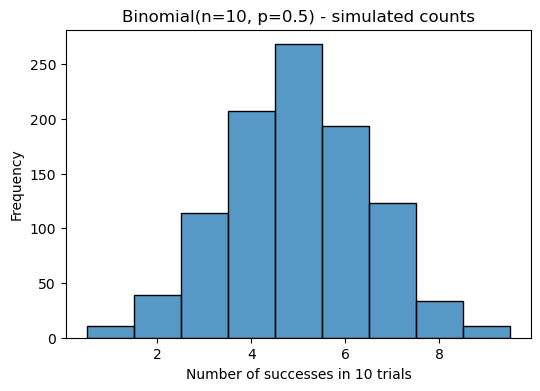

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# simulate 1000 trials of 10 Bernoulli trials
trials = np.random.binomial(n=10, p=0.5, size=1000)

plt.figure(figsize=(6,4))
sns.histplot(trials, bins=range(0,12), discrete=True)
plt.title('Binomial(n=10, p=0.5) - simulated counts')
plt.xlabel('Number of successes in 10 trials')
plt.ylabel('Frequency')
plt.show()

## 8. Central Limit Theorem demonstration
Generate many samples from an exponential distribution and plot sample means distribution.

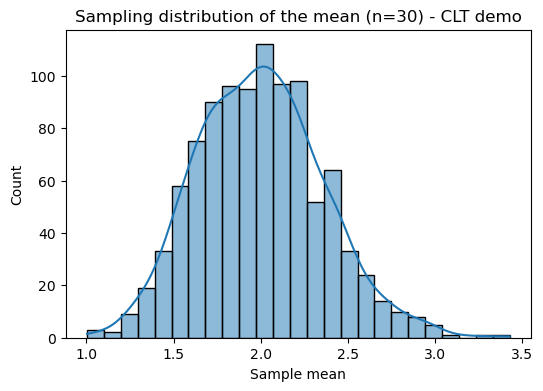

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
population = np.random.exponential(scale=2.0, size=100000)

# draw many samples of size 30 and compute means
sample_means = [population[np.random.randint(0, len(population), size=30)].mean() for _ in range(1000)]

plt.figure(figsize=(6,4))
sns.histplot(sample_means, kde=True)
plt.title('Sampling distribution of the mean (n=30) - CLT demo')
plt.xlabel('Sample mean')
plt.show()

## 9. Function to calculate and visualize confidence interval for a sample mean

Mean=5.050, 95% CI=(4.916, 5.184)


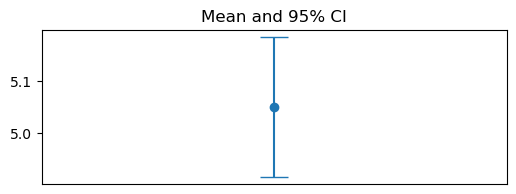

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    mean = a.mean()
    se = a.std(ddof=1) / np.sqrt(n)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean-h, mean+h

# example
sample = [5.1, 4.9, 5.0, 5.2, 5.1, 4.8, 5.3, 5.0]
mean, low, high = mean_confidence_interval(sample, 0.95)
print(f"Mean={mean:.3f}, 95% CI=({low:.3f}, {high:.3f})")

# simple visualization
plt.figure(figsize=(6,2))
plt.errorbar(1, mean, yerr=[[mean-low],[high-mean]], fmt='o', capsize=10)
plt.xlim(0,2)
plt.xticks([])
plt.title('Mean and 95% CI')
plt.show()

## 10. Chi-square goodness-of-fit test (code)

In [5]:
from scipy import stats
import numpy as np

# observed counts (example)
observed = np.array([18, 22, 20, 15, 25])

# expected proportions (say uniform) -> expected counts
expected_props = np.array([1/5]*5)
expected = expected_props * observed.sum()

chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

print("Observed:", observed)
print("Expected:", expected.astype(int))
print("Chi2 statistic:", chi2_stat)
print("p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject the null: observed distribution differs from expected.")
else:
    print("Fail to reject the null: no evidence of difference.")

Observed: [18 22 20 15 25]
Expected: [20 20 20 20 20]
Chi2 statistic: 2.9
p-value: 0.5746972058298043
Fail to reject the null: no evidence of difference.
